## Process 0: Setup

**python -m venv ./venv**

Run that in your terminal to set up the virtual environment, then run the below command. If you don't care about using a virtual environment, just run the below command to install the required packages for your current version of Python.

In [1]:
%pip install pandas numpy matplotlib seaborn scikit-learn tensorflow xgboost

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


You can also run the following:

In [2]:
%pip install -r requirements.txt

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


## Process 1: Data Cleaning

In [3]:
#import data
import pandas as pd
import numpy as np

data = pd.read_csv('./Raw Data/Clean_Dataset.csv')
data.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [4]:
#drop 1st column
data = data.drop(data.columns[0], axis=1)
data.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [5]:
#CREATE NEW COLUMN TO CONVERT PRICES TO USD

#conversion rate from INR to USD
conversion_rate = 0.012

#function to convert price from INR to USD
def convert_to_usd(price_inr):
    return price_inr * conversion_rate

#create new column for USD price, applying conversion and round to the nearest cent
data['priceUSD'] = data['price'].apply(convert_to_usd).apply(lambda x: round(x, 2))

#rename current price column to indicate it is INR (Indian Rupee)
data = data.rename(columns={'price': 'priceINR'})

data.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,priceINR,priceUSD
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953,71.44
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953,71.44
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956,71.47
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955,71.46
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955,71.46


In [6]:
#CONVERT STOPS VALUES FROM STRING TO NUMERICAL

#mapping dictionary
number_mapping = {'zero': 0, 'one': 1, 'two_or_more': 2}

# Convert string versions of numbers to numerical values
data['stops'] = data['stops'].map(number_mapping)

data.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,priceINR,priceUSD
0,SpiceJet,SG-8709,Delhi,Evening,0,Night,Mumbai,Economy,2.17,1,5953,71.44
1,SpiceJet,SG-8157,Delhi,Early_Morning,0,Morning,Mumbai,Economy,2.33,1,5953,71.44
2,AirAsia,I5-764,Delhi,Early_Morning,0,Early_Morning,Mumbai,Economy,2.17,1,5956,71.47
3,Vistara,UK-995,Delhi,Morning,0,Afternoon,Mumbai,Economy,2.25,1,5955,71.46
4,Vistara,UK-963,Delhi,Morning,0,Morning,Mumbai,Economy,2.33,1,5955,71.46


## Process 2: Descriptive statistics

In [7]:
#CONVERT CLASS TO BINARY VARIABLE (Economy 0, Business 1)

data['class'].replace({'Economy': 0, 'Business': 1}, inplace=True)

data.head()

C:\Users\Ronit\AppData\Local\Temp\ipykernel_20200\284662854.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['class'].replace({'Economy': 0, 'Business': 1}, inplace=True)
C:\Users\Ronit\AppData\Local\Temp\ipykernel_20200\284662854.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['cla

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,priceINR,priceUSD
0,SpiceJet,SG-8709,Delhi,Evening,0,Night,Mumbai,0,2.17,1,5953,71.44
1,SpiceJet,SG-8157,Delhi,Early_Morning,0,Morning,Mumbai,0,2.33,1,5953,71.44
2,AirAsia,I5-764,Delhi,Early_Morning,0,Early_Morning,Mumbai,0,2.17,1,5956,71.47
3,Vistara,UK-995,Delhi,Morning,0,Afternoon,Mumbai,0,2.25,1,5955,71.46
4,Vistara,UK-963,Delhi,Morning,0,Morning,Mumbai,0,2.33,1,5955,71.46


In [8]:
# Show summary statistics
data.describe()

,stops,class,duration,days_left,priceINR,priceUSD
count,300153.000000,300153.000000,300153.000000,300153.000000,300153.000000,300153.000000
mean,0.924312,0.311464,12.221021,26.004751,20889.660523,250.676072
std,0.398106,0.463093,7.191997,13.561004,22697.767366,272.373277
min,0.000000,0.000000,0.830000,1.000000,1105.000000,13.260000
25%,1.000000,0.000000,6.830000,15.000000,4783.000000,57.400000
50%,1.000000,0.000000,11.250000,26.000000,7425.000000,89.100000
75%,1.000000,1.000000,16.170000,38.000000,42521.000000,510.250000
max,2.000000,1.000000,49.830000,49.000000,123071.000000,1476.850000


In [9]:
# Display frequency of airlines among flights
airline_frequency = data['airline'].value_counts()
print("List of Airlines Sorted by Frequency:")
print(airline_frequency)

List of Airlines Sorted by Frequency:
airline
Vistara      127859
Air_India     80892
Indigo        43120
GO_FIRST      23173
AirAsia       16098
SpiceJet       9011
Name: count, dtype: int64


## Process 3: Data visualization and notes

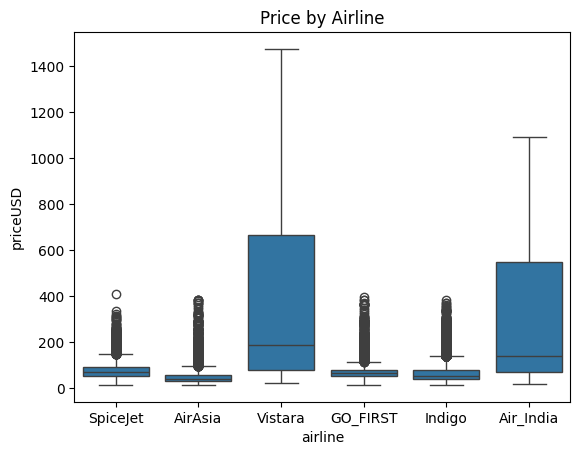

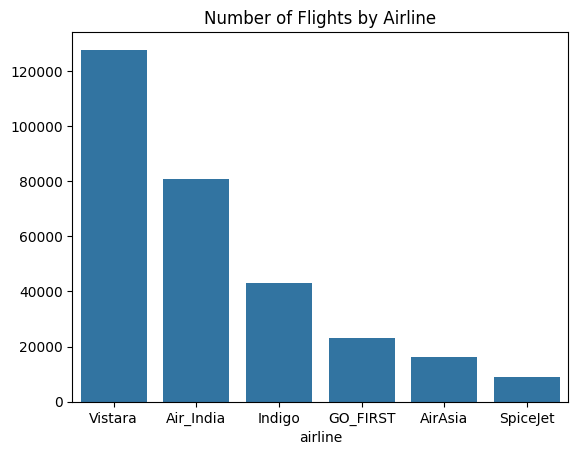

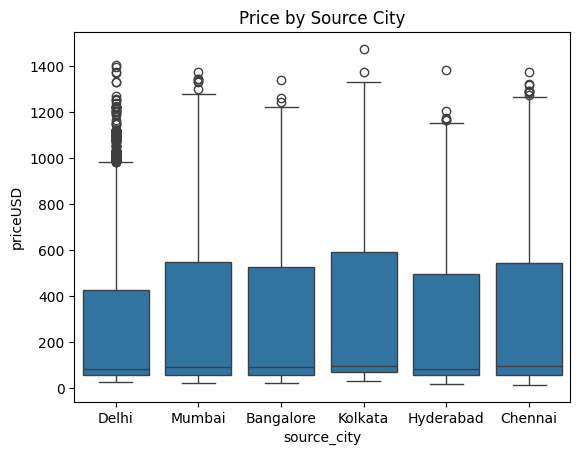

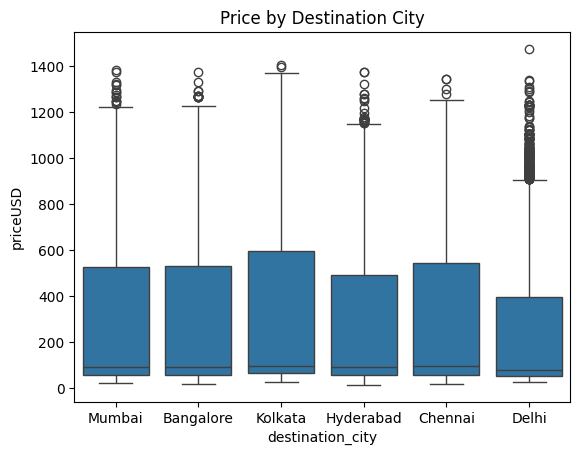

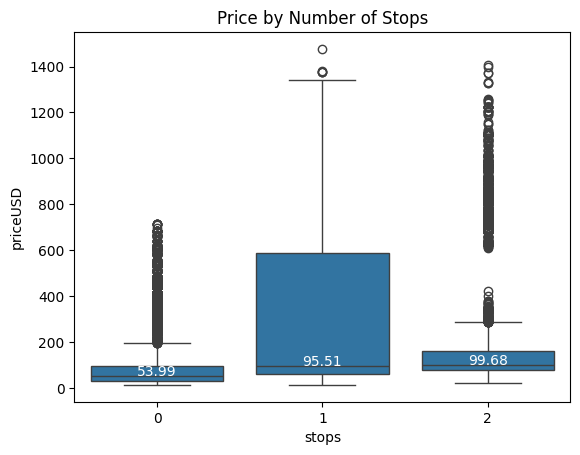

C:\Users\Ronit\AppData\Local\Temp\ipykernel_20200\1284664759.py:40: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(xtick, medians[xtick], medians[xtick], horizontalalignment='center', color='w')


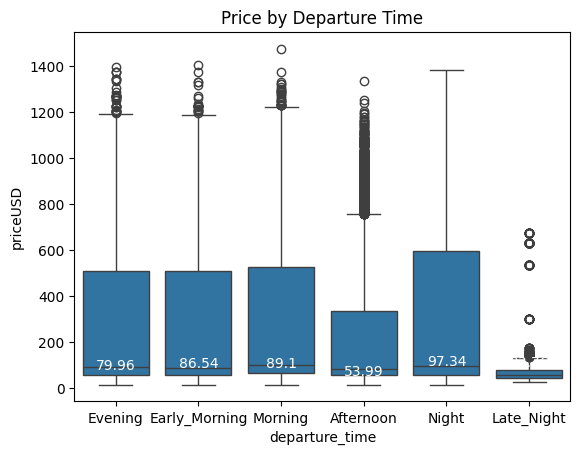

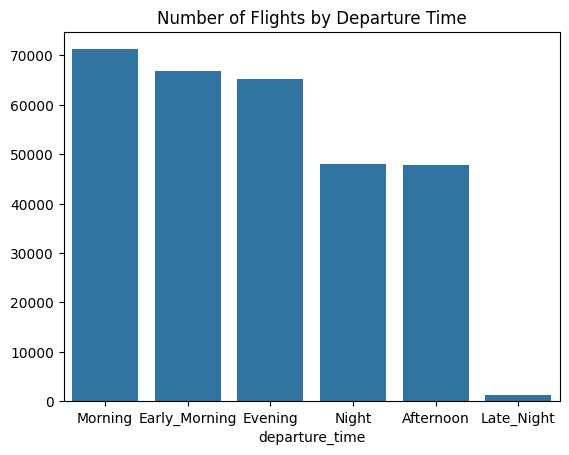

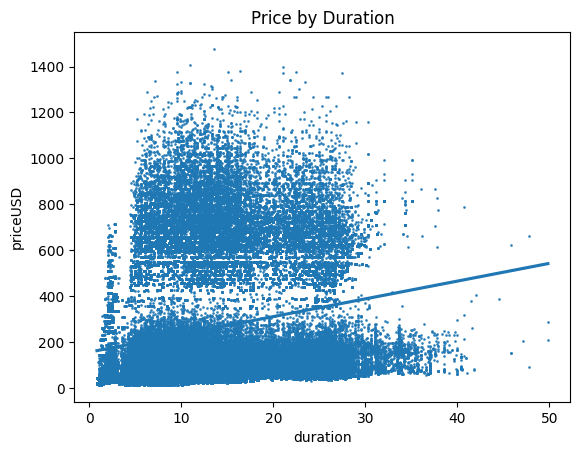

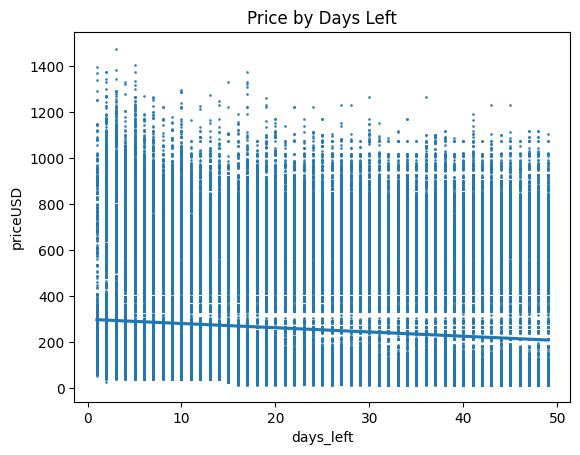

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Exploring the relationship between airline and price with a box plot
plt.title('Price by Airline')
sns.boxplot(x='airline', y='priceUSD', data=data)
plt.show()

# Count the number of datapoints for each airline and display in a chart to see if the number of flights in the dataset is influencing the price
airline_counts = data['airline'].value_counts()
plt.title('Number of Flights by Airline')
sns.barplot(x=airline_counts.index, y=airline_counts.values)
plt.show()
# Exploring the relationship between source_city and price with a box plot
plt.title('Price by Source City')
sns.boxplot(x='source_city', y='priceUSD', data=data)
plt.show()

# Exploring the relationship between destination_city and price with a box plot
plt.title('Price by Destination City')
sns.boxplot(x='destination_city', y='priceUSD', data=data)
plt.show()

# Neither of these are very fruitful, so we will not use these columns in our report
# Exploring the relationship between stops and price with a box plot
plt.title('Price by Number of Stops')
sns.boxplot(x='stops', y='priceUSD', data=data)
#add a label for the median price for each number of stops
medians = data.groupby('stops')['priceUSD'].median()
for xtick in plt.gca().get_xticks():
    plt.text(xtick, medians[xtick], medians[xtick], horizontalalignment='center', color='w')
plt.show()

# This is interesting because in the US, more layovers usually implies a cheaper flight, but a nonstop flight is cheaper in India. This is likely due to the fact that the dataset is limited to domestic flights in India, and the number of stops relates to the distance traveled.
# Exploring the relationship between departure_time and price with a box plot
plt.title('Price by Departure Time')
sns.boxplot(x='departure_time', y='priceUSD', data=data)
medians = data.groupby('departure_time')['priceUSD'].median()
for xtick in plt.gca().get_xticks():
    plt.text(xtick, medians[xtick], medians[xtick], horizontalalignment='center', color='w')
plt.show()

# Display how many of each departure time there are in the dataset with a bar graph
departure_time_counts = data['departure_time'].value_counts()
plt.title('Number of Flights by Departure Time')
sns.barplot(x=departure_time_counts.index, y=departure_time_counts.values)
plt.show()

# This is interesting because the price of flights departing in the afternoon is the cheapest, which is unexpected
# Exploring the relationship between duration and price with a scatter plot.
plt.title('Price by Duration')
sns.regplot(x='duration', y='priceUSD', data=data, scatter_kws={'s': 1})
plt.show()
# This plot is not that conclusive and would be better suited to a regression model
# Exploring the relationship between days_left and price with a scatter plot.
plt.title('Price by Days Left')
sns.regplot(x='days_left', y='priceUSD', data=data, scatter_kws={'s': 1})
plt.show()

# The trend shows that the further from the departure date, the cheaper the flight. This is expected, as flights are usually cheaper when booked in advance, but it would interesting to see if this trend holds for flights booked within a week of the departure date.
# However, this plot is not that conclusive and would be better suited to a regression model

## Process 4: Building the models

In [11]:
print(data.columns)

Index(['airline', 'flight', 'source_city', 'departure_time', 'stops',
       'arrival_time', 'destination_city', 'class', 'duration', 'days_left',
       'priceINR', 'priceUSD'],
      dtype='object')


In [12]:
data.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,priceINR,priceUSD
0,SpiceJet,SG-8709,Delhi,Evening,0,Night,Mumbai,0,2.17,1,5953,71.44
1,SpiceJet,SG-8157,Delhi,Early_Morning,0,Morning,Mumbai,0,2.33,1,5953,71.44
2,AirAsia,I5-764,Delhi,Early_Morning,0,Early_Morning,Mumbai,0,2.17,1,5956,71.47
3,Vistara,UK-995,Delhi,Morning,0,Afternoon,Mumbai,0,2.25,1,5955,71.46
4,Vistara,UK-963,Delhi,Morning,0,Morning,Mumbai,0,2.33,1,5955,71.46


In [13]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np


encoder = OneHotEncoder(drop='first', handle_unknown='ignore')
categoricalFeatures = ['airline', 'source_city', 'stops', 'departure_time', 'arrival_time', 'destination_city', 'class']
encodedFeatures = encoder.fit_transform(data[categoricalFeatures])

numericalFeatures = data[['duration', 'days_left']].to_numpy()  # Assuming 'priceUSD' is not part of numericalFeatures here

encodedFeaturesDense = encodedFeatures.toarray()

features = np.concatenate([encodedFeaturesDense, numericalFeatures], axis=1)

X = features  # All features
y = data['priceUSD'].to_numpy()  # Target variable is the price in USD

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

linearReg = LinearRegression()
linearReg.fit(X_train, y_train)
y_pred_lr = linearReg.predict(X_test)

# this part evaluates the linear regression model
print("Linear Regression Model Performance:")
print("Mean Squared Error (MSE):", mean_squared_error(y_test, y_pred_lr))
print("Coefficient of Determination (R^2):", r2_score(y_test, y_pred_lr))

# this part is the random forest regressor model
randomForestReg = RandomForestRegressor(n_estimators=100, random_state=42)
randomForestReg.fit(X_train, y_train)
y_pred_rf = randomForestReg.predict(X_test)

# this part evaluates the random forest regressor model
print("\nRandom Forest Regressor Model Performance:")
print("Mean Squared Error (MSE):", mean_squared_error(y_test, y_pred_rf))
print("Coefficient of Determination (R^2):", r2_score(y_test, y_pred_rf))

Linear Regression Model Performance:
Mean Squared Error (MSE): 6583.837665029354
Coefficient of Determination (R^2): 0.91130428869681

Random Forest Regressor Model Performance:
Mean Squared Error (MSE): 1129.0909310412605
Coefficient of Determination (R^2): 0.984789187044113


In [14]:
import warnings

warnings.filterwarnings("ignore", message="X does not have valid feature names")

categoricalFeatures = ['airline', 'source_city', 'stops', 'departure_time', 'arrival_time', 'destination_city', 'class']

# Updated 'newData' dictionary with numerical representations for 'stops' and 'class'
sampleData1 = {
    'airline': 'Vistara',
    'source_city': 'Delhi',
    'departure_time': 'Morning',
    'stops': 0,  # Numerical representation
    'arrival_time': 'Afternoon',
    'destination_city': 'Mumbai',
    'class': 0,  # 0 for Economy, 1 for Business (numerical representation)
    'duration': 2.5,
    'days_left': 10
}

def predictPrice(newData, model, encoder):
    newDataFormatted = {key: str(value) if key in ['stops', 'class'] else value for key, value in newData.items()}

    # Extract features in the order expected by the encoder
    newDataProcessed = [[newDataFormatted[feature] for feature in categoricalFeatures]]

    # Encode the newData using the previously fitted encoder
    newDataEncoded = encoder.transform(newDataProcessed).toarray()

    # Combine encoded categorical data with any numerical features not included in the encoder
    numericalData = np.array([[newData['duration'], newData['days_left']]])
    completeFeatures = np.hstack((newDataEncoded, numericalData))
    
    # Predict using the provided model
    predictedPrice = model.predict(completeFeatures)
    return predictedPrice[0]

# Ensure that when you fit the encoder and train your models, 'stops' and 'class' are treated as numerical features.

# Example usage:
linearRegPredictedPrice = predictPrice(sampleData1, linearReg, encoder)
print(f"Predicted Flight Price (LinReg): USD {linearRegPredictedPrice:.2f}")

randomForestRegPredictedPrice = predictPrice(sampleData1, randomForestReg, encoder)
print(f"Predicted Flight Price (RFReg): USD {randomForestRegPredictedPrice:.2f}")

Predicted Flight Price (LinReg): USD 27.89
Predicted Flight Price (RFReg): USD 87.70


c:\Users\Ronit\Desktop\TeamAirData\venv\Lib\site-packages\sklearn\preprocessing\_encoders.py:241: UserWarning: Found unknown categories in columns [2, 6] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
c:\Users\Ronit\Desktop\TeamAirData\venv\Lib\site-packages\sklearn\preprocessing\_encoders.py:241: UserWarning: Found unknown categories in columns [2, 6] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [15]:
data.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,priceINR,priceUSD
0,SpiceJet,SG-8709,Delhi,Evening,0,Night,Mumbai,0,2.17,1,5953,71.44
1,SpiceJet,SG-8157,Delhi,Early_Morning,0,Morning,Mumbai,0,2.33,1,5953,71.44
2,AirAsia,I5-764,Delhi,Early_Morning,0,Early_Morning,Mumbai,0,2.17,1,5956,71.47
3,Vistara,UK-995,Delhi,Morning,0,Afternoon,Mumbai,0,2.25,1,5955,71.46
4,Vistara,UK-963,Delhi,Morning,0,Morning,Mumbai,0,2.33,1,5955,71.46


In [20]:
import warnings

warnings.filterwarnings("ignore", message="X does not have valid feature names")


realDataSamples = data.sample(5)


def predictPrice(newData, model, encoder):
    newDataFormatted = {key: str(value) if key in ['stops', 'class'] else value for key, value in newData.items()}

    # Extract features in the order expected by the encoder
    newDataProcessed = [[newDataFormatted[feature] for feature in categoricalFeatures]]

    # Encode the newData using the previously fitted encoder
    newDataEncoded = encoder.transform(newDataProcessed).toarray()

    # Combine encoded categorical data with any numerical features not included in the encoder
    numericalData = np.array([[newData['duration'], newData['days_left']]])
    completeFeatures = np.hstack((newDataEncoded, numericalData))
    
    # Predict using the provided model
    predictedPrice = model.predict(completeFeatures)
    return predictedPrice[0]

# Example usage
for index, row in realDataSamples.iterrows():
    real_data_entry = {
        'airline': row['airline'],
        'source_city': row['source_city'],
        'departure_time': row['departure_time'],
        'stops': row['stops'],  # Ensure this matches training data format
        'arrival_time': row['arrival_time'],
        'destination_city': row['destination_city'],
        'class': row['class'],  # Ensure this matches training data format
        'duration': row['duration'],
        'days_left': row['days_left']
    }
    print(real_data_entry)

    print(f"LinReg model predicts USD {predictPrice(real_data_entry, linearReg, encoder)}")
    print(f"RandomForestReg model predicts USD {predictPrice(real_data_entry, randomForestReg, encoder)}")
    print(f"Real price: USD {row['priceUSD']:.2f}")
    print()

# For hypothetical data, call predictPrice as you did before but ensure the encoder and models are correctly defined and used

{'airline': 'Vistara', 'source_city': 'Bangalore', 'departure_time': 'Early_Morning', 'stops': 1, 'arrival_time': 'Evening', 'destination_city': 'Mumbai', 'class': 0, 'duration': 9.5, 'days_left': 45}
LinReg model predicts USD 4.07361225778665
RandomForestReg model predicts USD 78.8199999999999
Real price: USD 78.82

{'airline': 'Vistara', 'source_city': 'Mumbai', 'departure_time': 'Early_Morning', 'stops': 1, 'arrival_time': 'Evening', 'destination_city': 'Kolkata', 'class': 0, 'duration': 13.08, 'days_left': 24}
LinReg model predicts USD 52.99024715388308
RandomForestReg model predicts USD 71.39000000000011
Real price: USD 71.39

{'airline': 'Air_India', 'source_city': 'Mumbai', 'departure_time': 'Evening', 'stops': 1, 'arrival_time': 'Evening', 'destination_city': 'Delhi', 'class': 0, 'duration': 21.67, 'days_left': 8}
LinReg model predicts USD -0.9267051991204749
RandomForestReg model predicts USD 226.65030000000007
Real price: USD 269.77

{'airline': 'Vistara', 'source_city': 'Mum

c:\Users\Ronit\Desktop\TeamAirData\venv\Lib\site-packages\sklearn\preprocessing\_encoders.py:241: UserWarning: Found unknown categories in columns [2, 6] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
c:\Users\Ronit\Desktop\TeamAirData\venv\Lib\site-packages\sklearn\preprocessing\_encoders.py:241: UserWarning: Found unknown categories in columns [2, 6] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
c:\Users\Ronit\Desktop\TeamAirData\venv\Lib\site-packages\sklearn\preprocessing\_encoders.py:241: UserWarning: Found unknown categories in columns [2, 6] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
c:\Users\Ronit\Desktop\TeamAirData\venv\Lib\site-packages\sklearn\preprocessing\_encoders.py:241: UserWarning: Found unknown categories in columns [2, 6] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
c:\Users\Ronit\Desktop\TeamA

## Process 5: Testing and improving the models

In [22]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score

# Initialize an XGBoost regressor object
xgb_reg = xgb.XGBRegressor(objective='reg:squarederror',
                           colsample_bytree=0.3,
                           learning_rate=0.1,
                           max_depth=5,
                           alpha=10,
                           n_estimators=100)

# Fit the regressor to the training set
xgb_reg.fit(X_train, y_train)

# Predict on the test set
y_pred_xgb = xgb_reg.predict(X_test)

# Evaluate the model
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print("XGBoost Regressor Model Performance:")
print("Mean Squared Error (MSE):", mse_xgb)
print("Coefficient of Determination (R^2):", r2_xgb)

XGBoost Regressor Model Performance:
Mean Squared Error (MSE): 3519.166396402208
Coefficient of Determination (R^2): 0.9525907255610037


In [23]:
for index, row in realDataSamples.iterrows():
    real_data_entry = {
        'airline': row['airline'],
        'source_city': row['source_city'],
        'departure_time': row['departure_time'],
        'stops': row['stops'],  # Already in string format as per your dataset example
        'arrival_time': row['arrival_time'],
        'destination_city': row['destination_city'],
        'class': row['class'],
        'duration': row['duration'],
        'days_left': row['days_left']
    }
    print(f"XGBoost model predicts USD {predictPrice(real_data_entry, xgb_reg, encoder)}")
    print(f"Real price: USD {row['priceUSD']:.2f}")

XGBoost model predicts USD 70.83382415771484
Real price: USD 78.82
XGBoost model predicts USD 73.35883331298828
Real price: USD 71.39
XGBoost model predicts USD 95.54263305664062
Real price: USD 269.77
XGBoost model predicts USD 156.69873046875
Real price: USD 118.55
XGBoost model predicts USD 40.62500762939453
Real price: USD 715.79


c:\Users\Ronit\Desktop\TeamAirData\venv\Lib\site-packages\sklearn\preprocessing\_encoders.py:241: UserWarning: Found unknown categories in columns [2, 6] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
c:\Users\Ronit\Desktop\TeamAirData\venv\Lib\site-packages\sklearn\preprocessing\_encoders.py:241: UserWarning: Found unknown categories in columns [2, 6] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
c:\Users\Ronit\Desktop\TeamAirData\venv\Lib\site-packages\sklearn\preprocessing\_encoders.py:241: UserWarning: Found unknown categories in columns [2, 6] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
c:\Users\Ronit\Desktop\TeamAirData\venv\Lib\site-packages\sklearn\preprocessing\_encoders.py:241: UserWarning: Found unknown categories in columns [2, 6] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
c:\Users\Ronit\Desktop\TeamA

In [25]:
from sklearn.model_selection import cross_val_score

linearScores = cross_val_score(linearReg, X, y, cv=5, scoring='neg_mean_squared_error')
linearRmseScores = np.sqrt(-linearScores)

forestScores = cross_val_score(randomForestReg, X, y, cv=5, scoring='neg_mean_squared_error')
forestRmseScores = np.sqrt(-forestScores)

xgbScores = cross_val_score(xgb_reg, X, y, cv=5, scoring='neg_mean_squared_error')
xgbRmseScores = np.sqrt(-xgbScores)

print("Linear Regression RMSE scores:", linearRmseScores)
print("Random Forest Regressor RMSE scores:", forestRmseScores)
print("XGBoost Regressor RMSE scores:", xgbRmseScores)

Linear Regression RMSE scores: [ 66.7640571   52.17395103  58.00590151 113.46358387 137.29694748]
Random Forest Regressor RMSE scores: [ 29.07696132  28.0928418   28.98808736 102.46380387 138.49045218]
XGBoost Regressor RMSE scores: [ 84.86619082  64.57510921  93.14198728 122.87435407 144.34306737]


In [26]:
from sklearn.model_selection import cross_validate

scoring = ['neg_mean_squared_error', 'r2']
linearResults = cross_validate(linearReg, X, y, cv=5, scoring=scoring, return_train_score=True)
forestResults = cross_validate(randomForestReg, X, y, cv=5, scoring=scoring, return_train_score=True)
xgbResults = cross_validate(xgb_reg, X, y, cv=5, scoring=scoring, return_train_score=True)

linearRmse = np.sqrt(-linearResults['test_neg_mean_squared_error'].mean())
forestRmse = np.sqrt(-forestResults['test_neg_mean_squared_error'].mean())
xgbRmse = np.sqrt(-xgbResults['test_neg_mean_squared_error'].mean())

print("Linear Regression:")
print("Average RMSE:", linearRmse)
print("Average R^2:", linearResults['test_r2'].mean())

print("\nRandom Forest Regressor:")
print("Average RMSE:", forestRmse)
print("Average R^2:", forestResults['test_r2'].mean())

print("\nXGBoost Regressor:")
print("Average RMSE:", xgbRmse)
print("Average R^2:", xgbResults['test_r2'].mean())

Linear Regression:
Average RMSE: 91.94420237091823
Average R^2: -0.29528349096641604

Random Forest Regressor:
Average RMSE: 80.19154955304413
Average R^2: 0.5419377820852127

XGBoost Regressor:
Average RMSE: 105.81178842837011
Average R^2: -1.3091915139590453


## Process 6 (extra, unfinished): Using GridSearch to optimize

*This part took too long to run*

In [ ]:
# from sklearn.model_selection import GridSearchCV

# paramGrid = {
#     'n_estimators': [100, 200, 300],
#     'max_features': ['auto', 'sqrt'],
#     'max_depth': [10, 20, 30, None],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4],
# }

# gridSearch = GridSearchCV(randomForestReg, paramGrid, cv=5, scoring='neg_mean_squared_error', return_train_score=True)
# gridSearch.fit(XTrain, yTrain)

In [ ]:
# print("Best parameters:", gridSearch.best_params_)
# bestModel = gridSearch.best_estimator_
# finalPredictions = bestModel.predict(XTest)
# finalMse = mean_squared_error(yTest, finalPredictions)
# finalRmse = np.sqrt(finalMse)

# print("Final RMSE on Test Set:", finalRmse)